<a href="https://colab.research.google.com/github/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/notebooks/Week_2/Week_2_Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 1: Edge Detection

In [1]:
#@title 
from ipywidgets import widgets
out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id=f"9r8ph2pb9aw", width=854, height=480, fs=1, rel=0)
  print("Video available at https://youtube.com/watch?v=" + video.id)
  display(video)
display(out1)

Output()

In [2]:
#@title 
from IPython import display as IPyDisplay
IPyDisplay.HTML(
    f"""
  <div>
    <a href= "https://github.com/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/Slides/Week_2/DL4CV_Week02_Part01.pdf" target="_blank">
    <img src="https://github.com/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/Data/Slides_Logo.png?raw=1"
  alt="button link to Airtable" style="width:200px"></a>
    </div>""" )

## SOBEL FILTERS

The Sobel operator performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges. Typically it is used to find the approximate absolute gradient magnitude at each point in an input grayscale image.

### Implementation

In [4]:
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
import math
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# downloads the image we need to work on
!wget https://stsci-opo.org/STScI-01G8GZR18A6CBS9TGJS8JE9CM4.png

--2022-07-26 16:33:17--  https://stsci-opo.org/STScI-01G8GZR18A6CBS9TGJS8JE9CM4.png
Resolving stsci-opo.org (stsci-opo.org)... 13.35.231.50, 13.35.231.85, 13.35.231.129, ...
Connecting to stsci-opo.org (stsci-opo.org)|13.35.231.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4583472 (4.4M) [image/png]
Saving to: ‘STScI-01G8GZR18A6CBS9TGJS8JE9CM4.png’

STScI-01G8GZR18A6CB 100%[===================>]   4.37M  11.1MB/s    in 0.4s    

2022-07-26 16:33:17 (11.1 MB/s) - ‘STScI-01G8GZR18A6CBS9TGJS8JE9CM4.png’ saved [4583472/4583472]



In [23]:
image_location = 'https://stsci-opo.org/STScI-01G8GZR18A6CBS9TGJS8JE9CM4.png'[22:]

### STEP 1 : Converting an image from color to grayscale

<ipython-input-8-d785d609a60b>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure1.show()


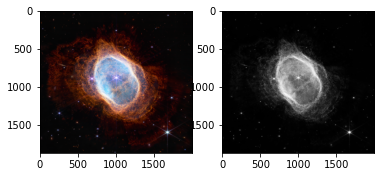

In [8]:

# Get the image and convert it to array of shape (Nx, Ny, Nz)
image_file = image_location
# array representation of image
input_image = imread(image_file) 
# nx: height, ny: width, nz: colors (RGB)
[nx, ny, nz] = np.shape(input_image)  

# Extracting each RGB components
r_img, g_img, b_img = input_image[:, :, 0], input_image[:, :, 1], input_image[:, :, 2]

# Here we are converting the color image to grayscale image by using weights and parameters
gamma = 1.400 
# weights for the RGB components respectively
r_const, g_const, b_const = 0.2126, 0.7152, 0.0722 
# conversion 
grayscale_image = r_const * r_img ** gamma + g_const * g_img ** gamma + b_const * b_img ** gamma

# This command will display the grayscale image alongside the original image
figure1 = plt.figure(1)
ax1, ax2 = figure1.add_subplot(121), figure1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
figure1.show()


### STEP2 - Applying the Sobel operator

Gx is vertical kernel and Gy is the horizontal kernel.

\begin{equation}
Gx = \begin{bmatrix} 1.0 & 0.0 & -1.0 \\ 2.0 & 0.0 & -2.0 \\ 1.0 & 0.0 & -1.0 \end{bmatrix} 
Gy = \begin{bmatrix} 1.0 & 2.0 & 1.0 \\ 0.0 & 0.0 & 0.0 \\ -1.0 & -2.0 & -1.0 \end{bmatrix}
\end{equation}

<ipython-input-10-e58eea4901a9>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure2.show()


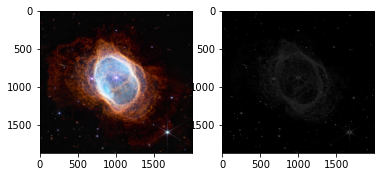

In [10]:
# Here we define the matrices associated with the Sobel filter
Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

# shape of the input grayscale image
rows, columns = np.shape(grayscale_image) 
# initialize the output images to zeros!
sobel_filtered_image = np.zeros(shape=(rows, columns))

# Convolution operation
for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3])) 
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)


# Display the original image and the Sobel filtered image
figure2 = plt.figure(2)
ax1, ax2 = figure2.add_subplot(121), figure2.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
figure2.show()
plt.show()

### References :


https://en.wikipedia.org/wiki/Sobel_operator

https://medium.com/@enzoftware/how-to-build-amazing-images-filters-with-python-median-filter-sobel-filter-%EF%B8%8F-%EF%B8%8F-22aeb8e2f540

https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm

https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv

https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html

https://learnopencv.com/edge-detection-using-opencv/

## CANNY EDGE DETECTOR

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986. Canny also produced a computational theory of edge detection explaining why the technique works.

Algorithm :

1. Filter image with derivative of Gaussian 
2. Find magnitude and orientation of gradient 
3. Non-maximum supression
4. Linking and thresholding(hysteresis):
    - Define two thresholds : low and high 
    - Use the high threshold to start edge curves and the low threshold to continue them.
    

### STEP 1 : apply gaussian filter to reduce the noise from the image

We can apply gaussian blur to smooth the image. We can do this by convolving the image with Gaussian Kernel. We can have different kenel sizes, sizes depends on the expected blurring effect. Smallest kernel means less visible blur. In our example let's use 5x5 kernel.

In [56]:
from scipy import ndimage
from scipy.ndimage.filters import convolve
from scipy import misc
import numpy as np
from matplotlib.pyplot import imshow

In [12]:
import numpy as np

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [121]:
img = plt.imread('STScI-01G8GZR18A6CBS9TGJS8JE9CM4.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [122]:
img

array([[0.03096863, 0.02862353, 0.02470196, ..., 0.04528628, 0.04880392,
        0.04447843],
       [0.02493726, 0.03282353, 0.02979608, ..., 0.04281569, 0.02672549,
        0.03109412],
       [0.01451373, 0.01641177, 0.02772941, ..., 0.02789804, 0.02902745,
        0.03267059],
       ...,
       [0.02789804, 0.02397647, 0.02627843, ..., 0.01148628, 0.01451373,
        0.01536471],
       [0.02789804, 0.02397647, 0.02627843, ..., 0.01378824, 0.01451373,
        0.0118902 ],
       [0.04079216, 0.03064706, 0.02627843, ..., 0.01613333, 0.01568628,
        0.01451373]], dtype=float32)

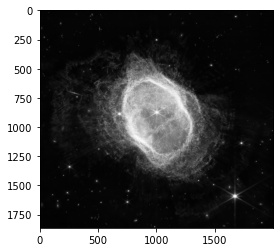

In [123]:
imshow(img, cmap="gray")

In [124]:
smooth_img = convolve(img, gaussian_kernel(5))

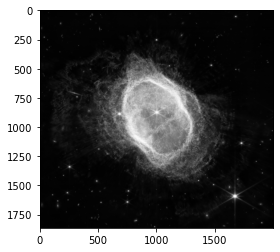

In [125]:
imshow(smooth_img, cmap='gray')

### STEP 2 : Find the edge intenity and direction by calculating the gradient of the image using edge detection operators

For simplicity let's use the convolve method from scipy

In [126]:
from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [127]:
gradientMat, thetaMat = sobel_filters(smooth_img)

In [128]:
gradientMat = gradientMat.astype('uint8')
thetaMat = thetaMat.astype('uint8')

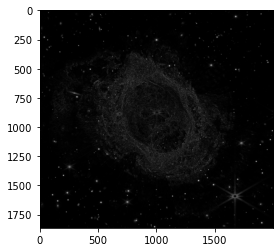

In [129]:
imshow(gradientMat, cmap='gray')

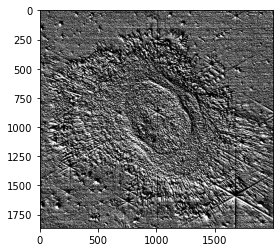

In [130]:
imshow(thetaMat, cmap='gray')

### STEP 3 : Non-Maximum Suppression

In [131]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [132]:
nonMaxImg = non_max_suppression(gradientMat, thetaMat)


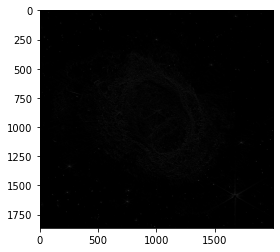

In [133]:
imshow(nonMaxImg, cmap='gray')

### STEP 4 : Linking and Thresholding

In [134]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return res

In [135]:
thresholdImg = threshold(nonMaxImg)

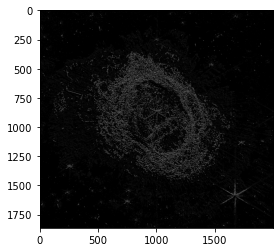

In [136]:
imshow(thresholdImg, cmap='gray')

In [137]:
def hysteresis(img):

    M, N = img.shape
    weak = 75 # weak pixel
    strong = 355 #stron pixel

    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass

    return img

In [138]:
final_img = hysteresis(thresholdImg)

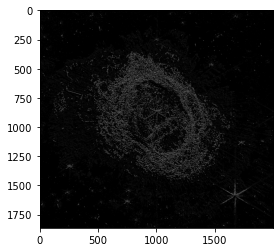

In [139]:
imshow(final_img, cmap='gray')

### References : 
https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
